# Playing with Runge-Kutta methods ##

In [43]:
from RKformula import *
from RKplot import *
from RKcolloc import *
from RKplot import *

Let us import somme predeined Runge-Kutta method descriptions:

In [44]:
load("lobatto4.sage","radau5.sage","sdirk3.sage","gauss4.sage","radau2a.sage","rk4.sage","sdirk5.sage")

Choose one formula:

In [45]:
#RK=Radau5
RK=Lobatto4
#RK=SDIRK3
#RK=Gauss4
#RK=Radau2a
#RK=RK4
#RK=SDIRK5

In [46]:
print RK.title

Lobatto method, order 4


and define the formula:

In [47]:
F=RKformula(RK.A,RK.B)

Ok, now let-us check different properties of the formula:

In [48]:
F.is_explicit()

False

In [49]:
F.is_A_stable()

False

In [50]:
F.is_L_stable()

False

In [51]:
F.is_stiffly_accurate()

False

In [52]:
F.is_algebraically_stable()

False

In [53]:
F.conserve_quadratic_invariants()

False

In [54]:
%display latex
F.stability_function()

(1/24*z^3 + 1/4*z^2 + 3/4*z + 1)/(-1/4*z + 1)

In [55]:
F.poles_of_stability_function()

[(4, 1)]

Find the limit of the stability domain on $\mathbb{R}^-$. It can be $-\infty$, for example if the method is A-stable:

In [56]:
F.stability_on_real_negative_axis()

-5.419951893353394?

In [57]:
F.order_of_stability_function()

4

In [58]:
F.order_using_rooted_trees()

4

Now, let-us draw the limite of the stability domain:

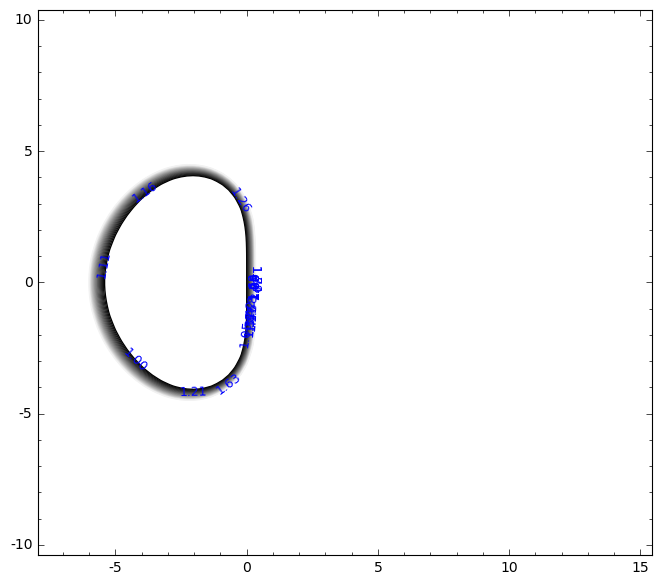

In [59]:
p=RKplot(F,fill=False,ncurves=20,limits=[(-7.5,+15),(-10,10)])
p.show()

We can also draw the order star:

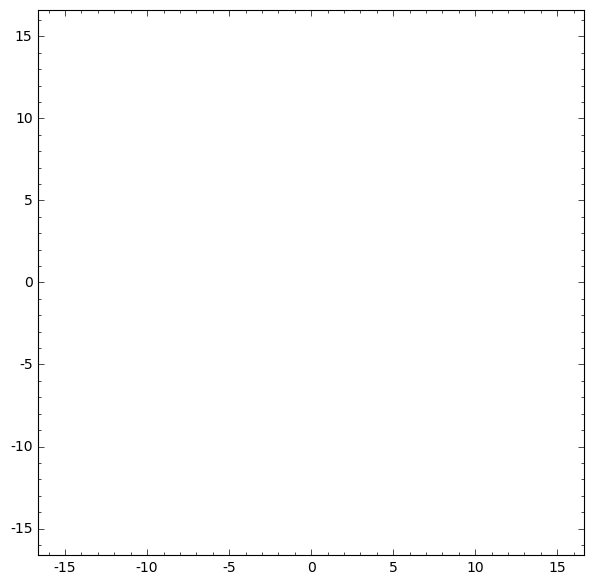

In [60]:
#p=RKplot(F,fill=False,ncurves=5,type="star")
p=RKplot(F,fill=False,ncurves=1,type="star")
p.show()